# Cheatsheet

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

# Read data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# Python optimisation variables
learning_rate = 0.1
epochs = 40
batch_size = 100

# declare the training data placeholders
# input x - for 28 x 28 pixels = 784
x = tf.placeholder(tf.float32, [None, 784])
# now declare the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 10])

# now declare the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random_normal([784, 300], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([300]), name='b1')
W2 = tf.Variable(tf.random_normal([300, 10], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([10]), name='b2')

# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(x, W1), b1)
hidden_out = tf.nn.relu(hidden_out)
y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))
y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))

# add an optimiser
optimiser = (tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
                .minimize(cross_entropy))

# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [5]:
sess = tf.Session()

sess.run(init_op)
total_batch = int(len(mnist.train.labels) / batch_size)
for epoch in range(epochs):
    avg_cost = 0
    avg_test_cost = 0
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
        _, c = sess.run([optimiser, cross_entropy], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c / total_batch
    print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
print(sess.run([accuracy, cross_entropy], feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Epoch: 1 cost = 0.792
Epoch: 2 cost = 0.416
Epoch: 3 cost = 0.315
Epoch: 4 cost = 0.253
Epoch: 5 cost = 0.210
Epoch: 6 cost = 0.181
Epoch: 7 cost = 0.157
Epoch: 8 cost = 0.138
Epoch: 9 cost = 0.124
Epoch: 10 cost = 0.111
Epoch: 11 cost = 0.101
Epoch: 12 cost = 0.091
Epoch: 13 cost = 0.083
Epoch: 14 cost = 0.075
Epoch: 15 cost = 0.069
Epoch: 16 cost = 0.063
Epoch: 17 cost = 0.058
Epoch: 18 cost = 0.054
Epoch: 19 cost = 0.049
Epoch: 20 cost = 0.045
Epoch: 21 cost = 0.042
Epoch: 22 cost = 0.039
Epoch: 23 cost = 0.036
Epoch: 24 cost = 0.033
Epoch: 25 cost = 0.031
Epoch: 26 cost = 0.028
Epoch: 27 cost = 0.027
Epoch: 28 cost = 0.025
Epoch: 29 cost = 0.023
Epoch: 30 cost = 0.022
Epoch: 31 cost = 0.020
Epoch: 32 cost = 0.019
Epoch: 33 cost = 0.018
Epoch: 34 cost = 0.017
Epoch: 35 cost = 0.016
Epoch: 36 cost = 0.015
Epoch: 37 cost = 0.014
Epoch: 38 cost = 0.013
Epoch: 39 cost = 0.012
Epoch: 40 cost = 0.012
[0.9803, 0.12326279]


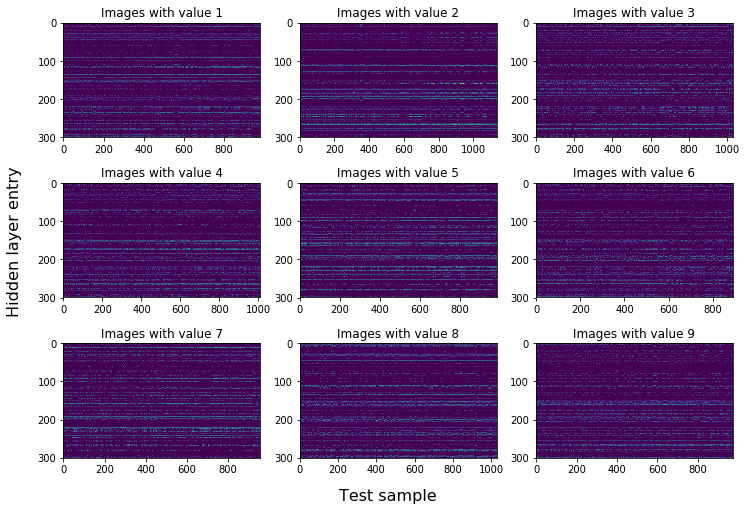

In [85]:
label_ind = mnist.test.labels == 1

fig, ax = plt.subplots(3,3,figsize=(12,8))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for label in range(0,9):
    input_data = mnist.test.images[label_ind[:,label]]
    hidden_layer = sess.run(hidden_out, feed_dict = {x: input_data})
    
    plt.subplot(3,3,label + 1)
    plt.imshow(hidden_layer.T,  aspect='auto')
    plt.title(f"Images with value {label + 1}")
    
fig.text(0.5, 0.05, 'Test sample', ha='center', fontsize = 16)
fig.text(0.06, 0.5, 'Hidden layer entry', va='center', rotation='vertical', fontsize = 16)

plt.savefig("hidden_layers.png")

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

test_hidden = sess.run(hidden_out, feed_dict = {x: mnist.test.images})
int_labels = np.where(mnist.test.labels)[0]

tsne_output = tsne.fit_transform(test_hidden)

Now we want to define a new network to gradient descent the optimal input data to output the indicator output values for each label. We will do this on the trained network, to view what the "ideal" input image is for 0,1,...,9.

In [86]:
trained_W1 = sess.run(W1)
trained_b1 = sess.run(b1)
trained_W2 = sess.run(W2)
trained_b2 = sess.run(b2)

In [135]:
# Create graph with variables as input, and constants as weights
learning_rate = 0.1
penalty = 0.25
epochs = 1000

# now declare the output data placeholder - 10 digits
x = tf.Variable(tf.random_uniform([1,784], minval=0, maxval=1), tf.float32, name='input_image')
y = tf.placeholder(tf.float32, [None, 10], name="output_y")

W1 = tf.placeholder(tf.float32, [784, 300])
b1 = tf.placeholder(tf.float32, [300])
W2 = tf.placeholder(tf.float32, [300, 10])
b2 = tf.placeholder(tf.float32, [10])

# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(x, W1), b1)
hidden_out = tf.nn.relu(hidden_out)

# now calculate the hidden layer output - in this case, let's use a softmax activated
# output layer
y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))

y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1)) + penalty*tf.reduce_sum(x**2)

# add an optimiser
optimiser = (tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
                 .minimize(cross_entropy))

# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Label: 0
Cost = 88.58317
Cost = 0.28142542
Cost = 0.27914438
Cost = 0.27914357
Cost = 0.27915743
Cost = 0.27909538
Cost = 0.27916944
Cost = 0.27913094
Cost = 0.27912414
Cost = 0.2791992
Label: 1
Cost = 96.560776
Cost = 0.08506021
Cost = 0.08267089
Cost = 0.08266943
Cost = 0.082661405
Cost = 0.08265884
Cost = 0.082653835
Cost = 0.08267441
Cost = 0.08264694
Cost = 0.082666576
Label: 2
Cost = 79.437584
Cost = 0.09043273
Cost = 0.08613436
Cost = 0.08614481
Cost = 0.08615626
Cost = 0.086143404
Cost = 0.08613387
Cost = 0.086146645
Cost = 0.08615355
Cost = 0.08614273
Label: 3
Cost = 75.3481
Cost = 0.19636247
Cost = 0.1939489
Cost = 0.1939305
Cost = 0.1939762
Cost = 0.19396727
Cost = 0.19395645
Cost = 0.19391009
Cost = 0.19389674
Cost = 0.19390857
Label: 4
Cost = 77.984024
Cost = 0.2609968
Cost = 0.2582667
Cost = 0.25826377
Cost = 0.25826013
Cost = 0.25829506
Cost = 0.2582524
Cost = 0.25825617
Cost = 0.25826752
Cost = 0.25826013


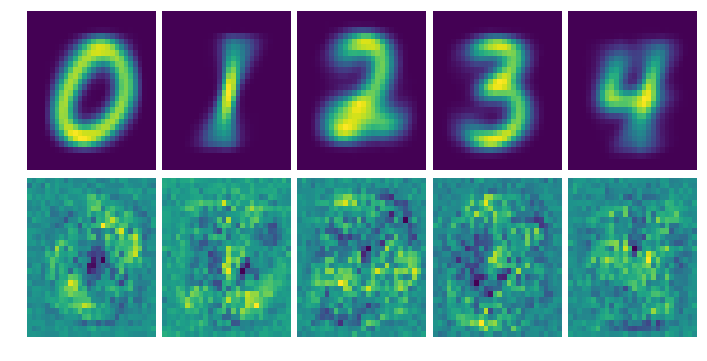

In [136]:
identity = np.identity(10)

fig, axes = plt.subplots(2,5,figsize=(12,6))
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for label in range(5):
    sess.run(init_op)
    print(f"Label: {label}")
    batch = mnist.test.labels[mnist.test.labels[:,label] == 1]
    for epoch in range(epochs):
        _, c = sess.run([optimiser, cross_entropy], feed_dict={W1: trained_W1,
                                                        b1: trained_b1,
                                                        W2: trained_W2,
                                                        b2: trained_b2,
                                                        y: batch})
        if (epoch % 100 == 0):
            print("Cost = " + str(c))
    trained_x = sess.run(x)
    
    plt.subplot(2,5,label + 1)
    plt.imshow(np.mean(mnist.test.images[mnist.test.labels[:,label] == 1], axis=0).reshape((28,28)), aspect='auto')
    plt.axis("off")
    plt.subplot(2,5,label + 6)
    plt.imshow(trained_x.reshape((28,28)), aspect='auto')
    plt.axis("off")
    
plt.savefig("ideal_outputs.png", bbox_inches = "tight", pad_inches=0.2)